# **Библиотеки**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# **Импорт данных**

In [19]:
df = pd.read_csv('/content/vgsales.csv')

# **Изучение и обработка данных**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
df['Year'] = df['Year'].astype('Int64')

In [22]:
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [23]:
df['Year'].value_counts().reset_index().sort_values(by='Year').head()

,Year,count
36,1980,9
24,1981,46
27,1982,36
30,1983,17
35,1984,14


In [24]:
df = df[df['Year']<2017] #уменьшим диапазон годов, так как после 2016 - мало данных для анализа

# **Анализ данных**

# **Игр какого жанра было создано больше всего?**

In [25]:
df['Genre'].value_counts()

,count
Genre,
Action,3252
Sports,2304
Misc,1710
Role-Playing,1469
Shooter,1282
Adventure,1276
Racing,1226
Platform,876
Simulation,850


<ipython-input-26-5dcc1739f5c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=df, order=df['Genre'].value_counts().index, palette="magma")  # Создаем столбчатую диаграмму с подсчетом количества записей


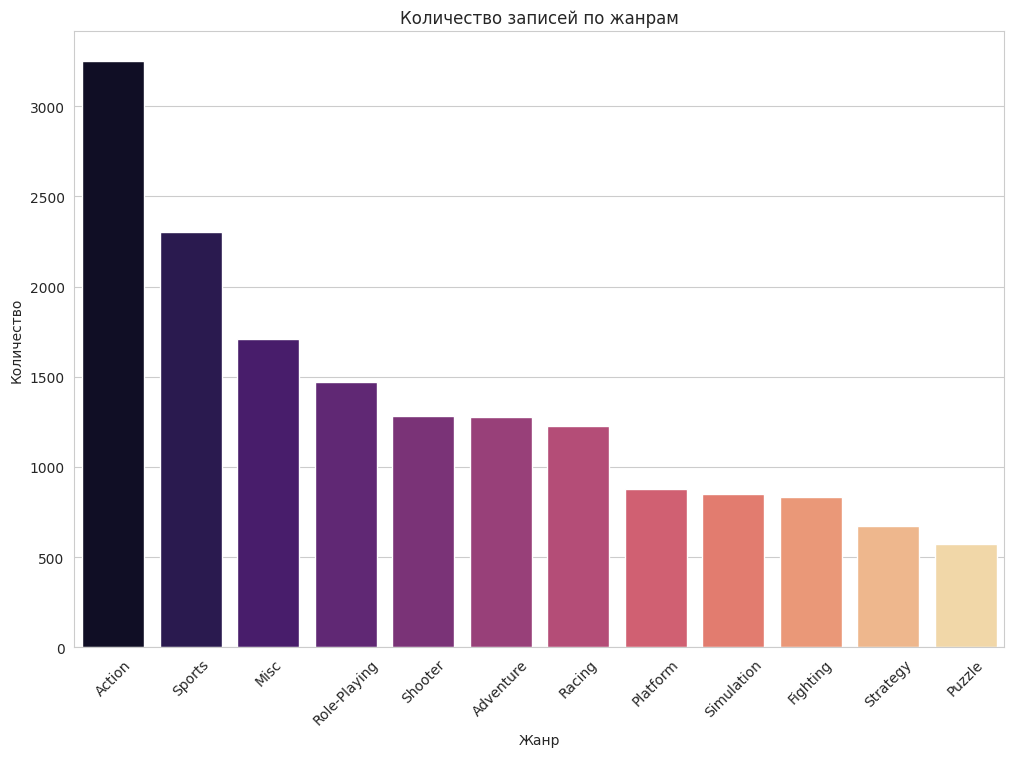

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Genre", data=df, order=df['Genre'].value_counts().index, palette="magma")  # Создаем столбчатую диаграмму с подсчетом количества записей

plt.xticks(rotation=45)

plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.title('Количество записей по жанрам')

plt.show()

Вывод:

Большинство людей любят экшены и спортивные игры.В экшенах 3316, а в спортивных 2346 игр выпускают.

# **В каком году продажи во всем мире были самыми высокими?**

In [27]:
data_year = df.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

In [28]:
data_year

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


<ipython-input-29-2db6da16c4b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Global_Sales", data=data_year, palette="magma")


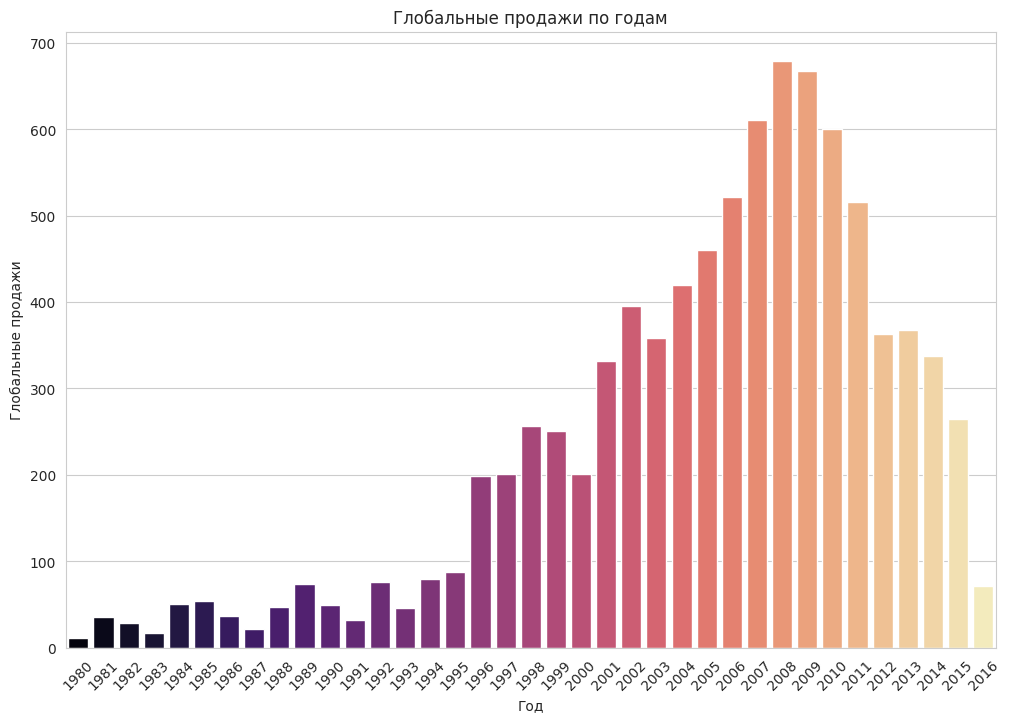

In [29]:
plt.figure(figsize=(12, 8))

sns.barplot(x="Year", y="Global_Sales", data=data_year, palette="magma")
plt.xticks(rotation=45)

plt.xlabel("Год")
plt.ylabel("Глобальные продажи")
plt.title("Глобальные продажи по годам")
plt.show()

Вывод:

2008 - 678.90

2009 - 667.30

2007 - 611.13

2010 - 600.45

2006 - 521.04

# **Игры какого жанра продаются по самой высокой цене во всем мире?**

In [30]:
data_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

<ipython-input-31-2a4a26799336>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Genre", y="Global_Sales", data=data_genre, palette="magma")


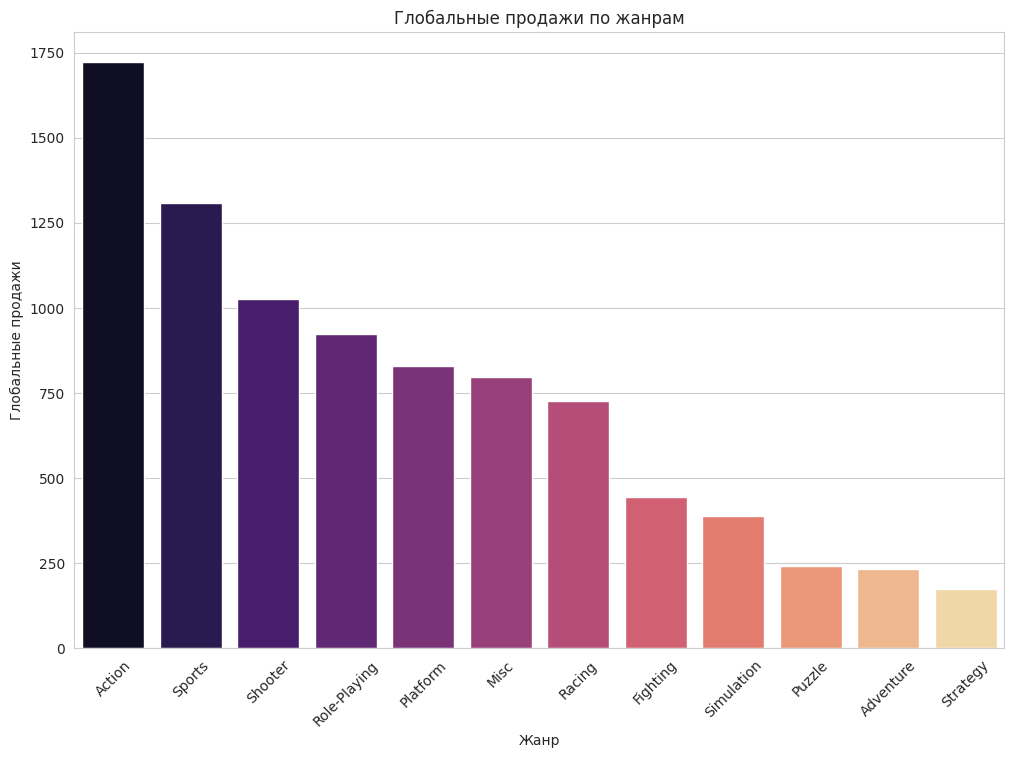

In [31]:
plt.figure(figsize=(12, 8))

sns.barplot(x="Genre", y="Global_Sales", data=data_genre, palette="magma")

plt.xticks(rotation=45)

plt.xlabel("Жанр")
plt.ylabel("Глобальные продажи")
plt.title("Глобальные продажи по жанрам")

plt.grid(True, axis='y')

plt.show()

Вывод:

2009 год - 139,36 млн.

2008 год - 136,39 млн.

# **Какая игра имеет самую высокую цену продажи во всем мире?**

In [32]:
top_game_sale = df.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [33]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

<ipython-input-34-076ec9654554>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale, palette="plasma")


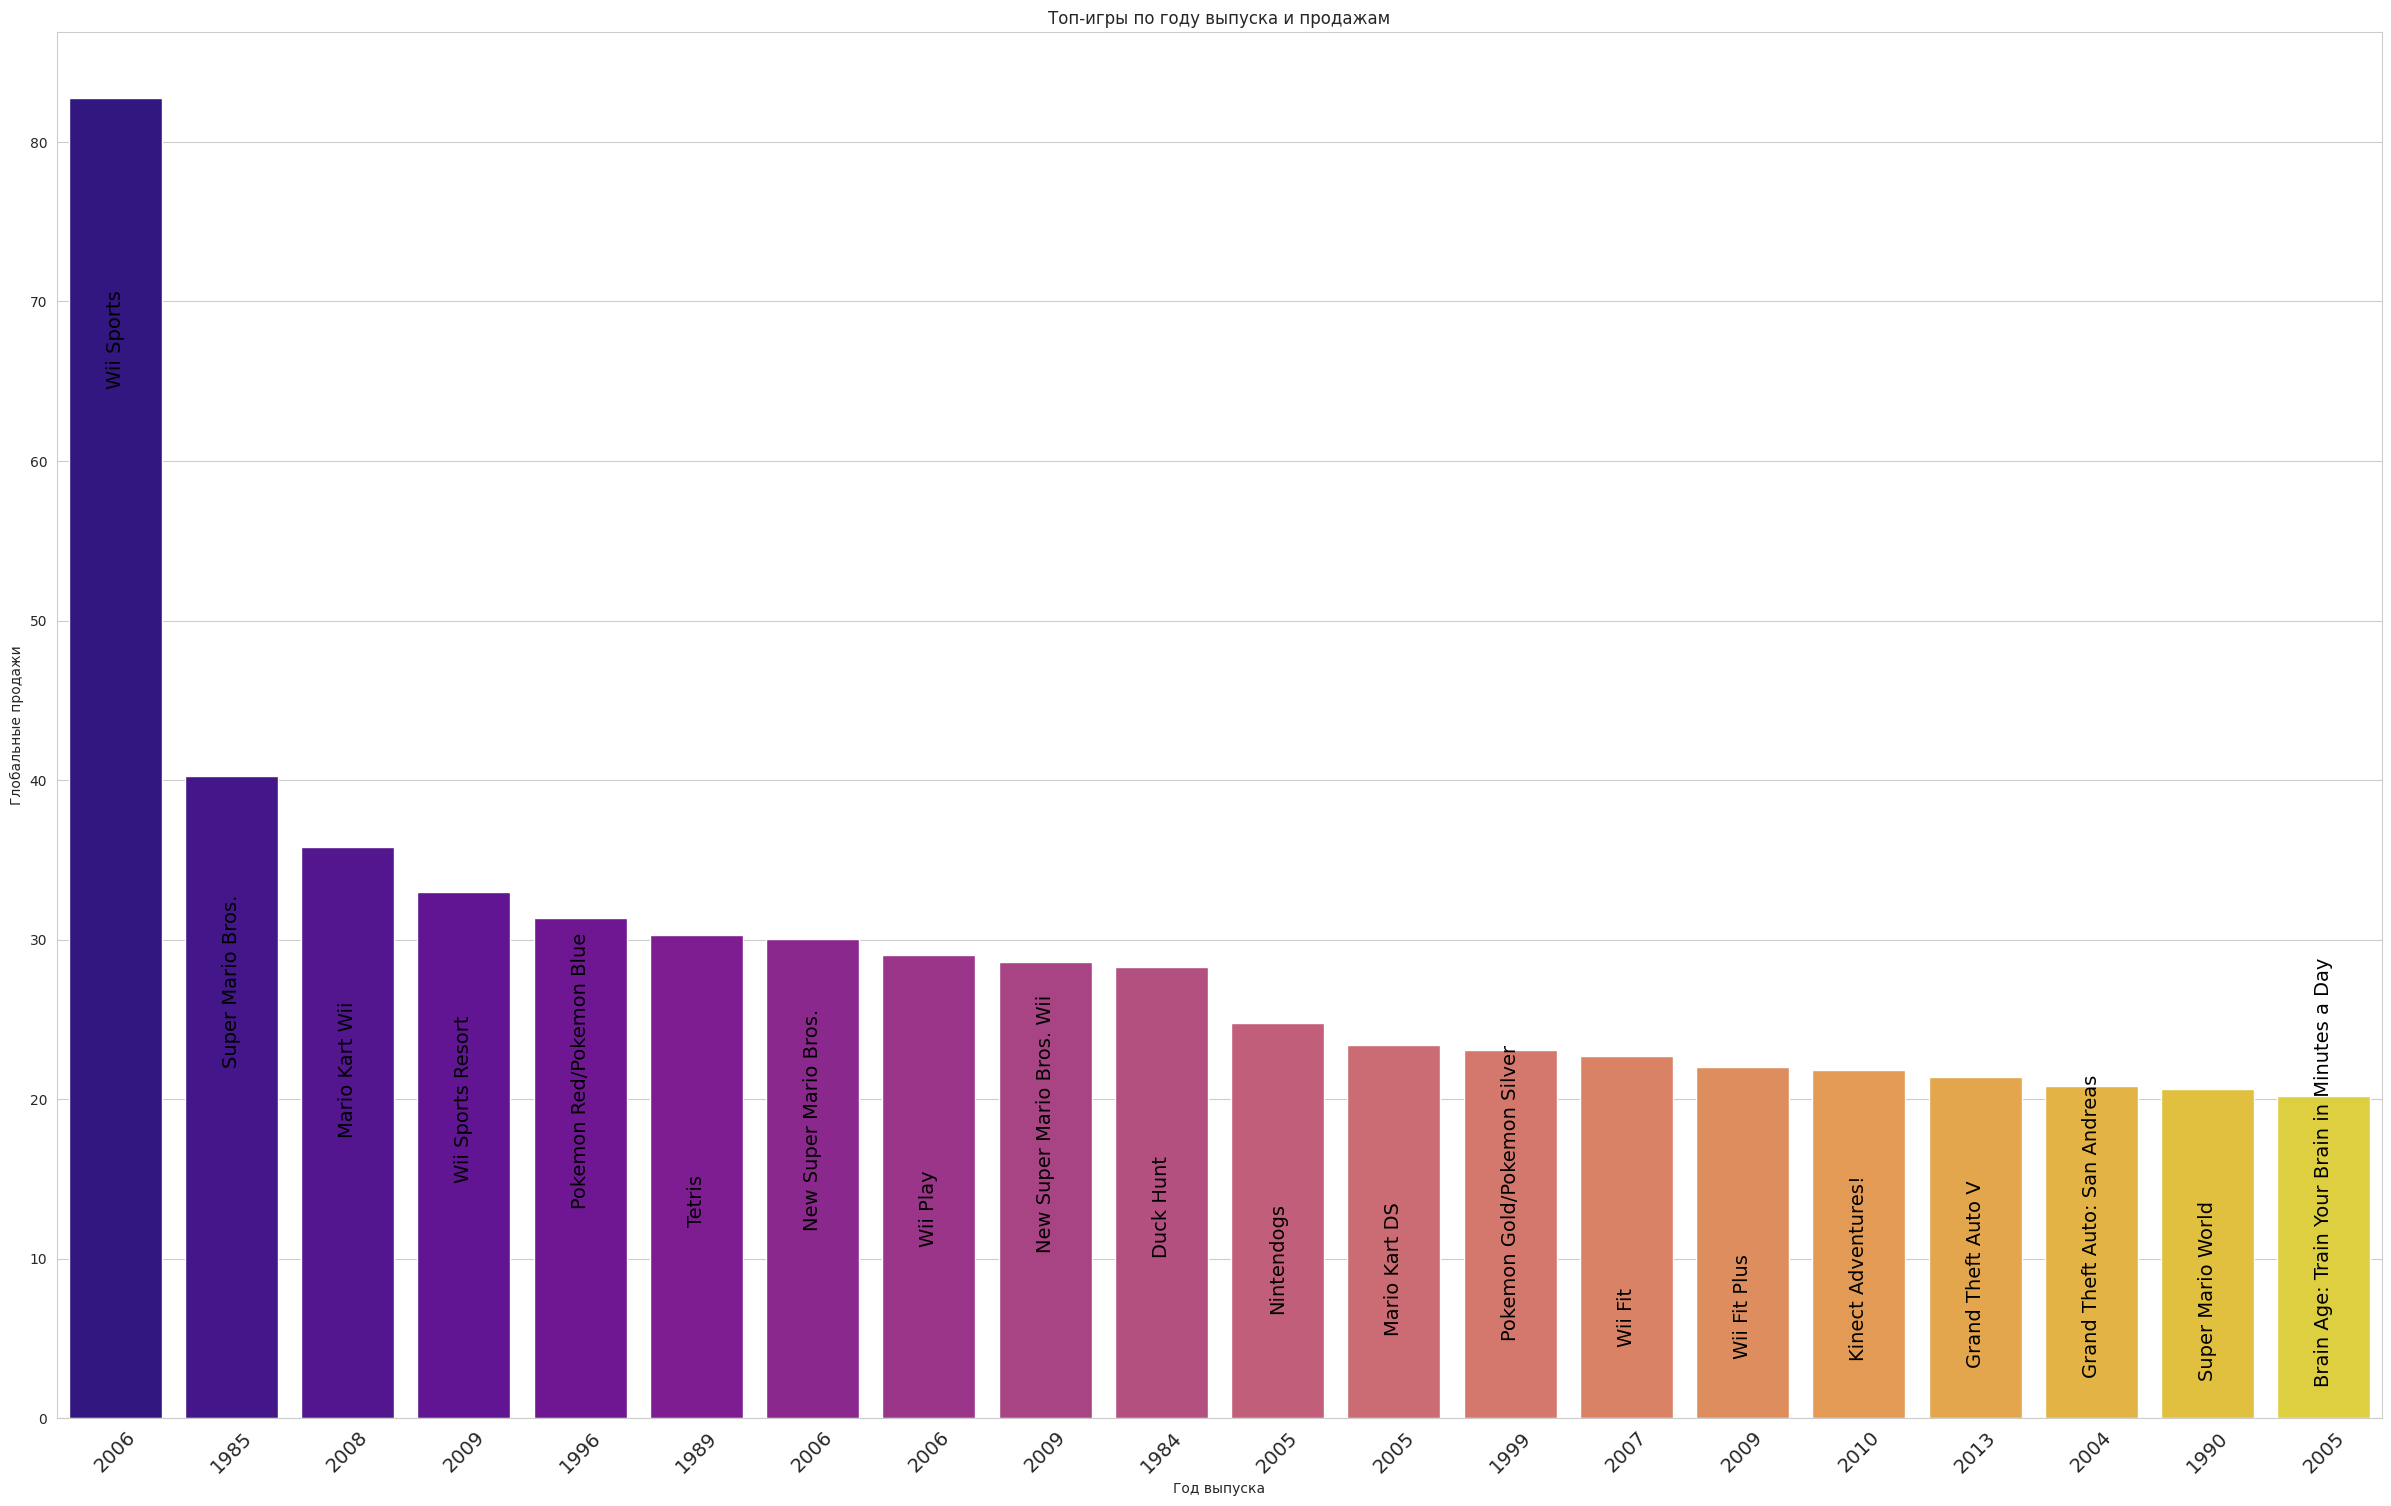

In [34]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale, palette="plasma")
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='black', size=14, rotation=90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=45)
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи')
plt.title('Топ-игры по году выпуска и продажам')

plt.show()

# **Сравнение продаж по жанрам**

In [35]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()

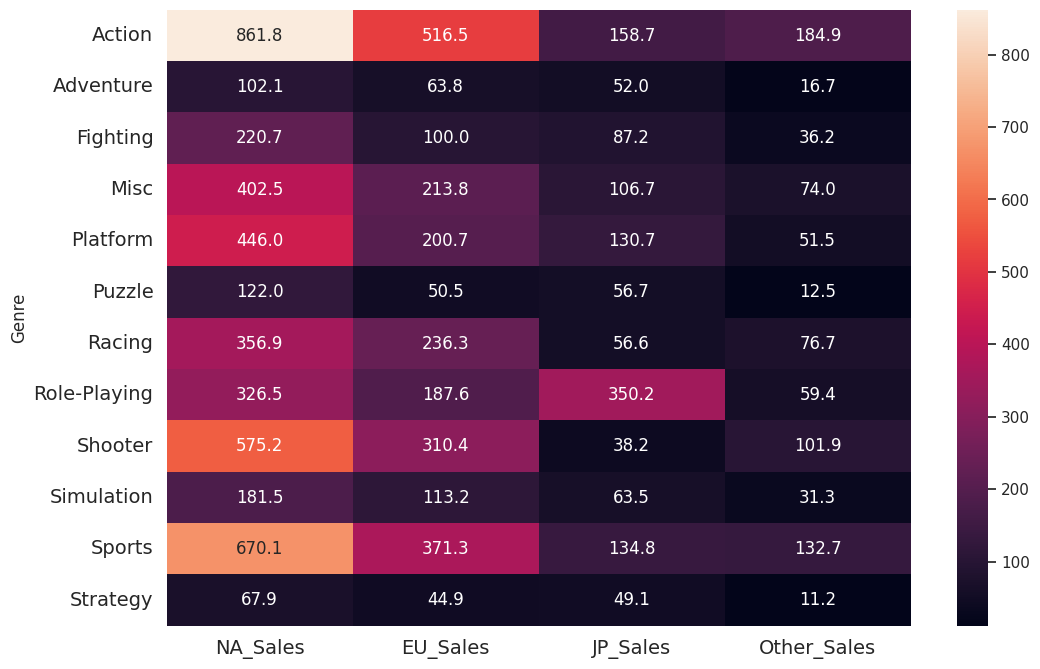

In [36]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# **Сравнение продаж по жанрам**

In [37]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [38]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [39]:
comp_platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,2600,80.78,4.86,0.00,0.84
1,3DO,0.00,0.00,0.10,0.00
2,3DS,78.03,58.30,97.30,12.55
3,DC,5.43,1.69,8.56,0.27
4,DS,388.29,194.07,175.02,60.27
5,GB,113.64,47.51,85.12,8.16
6,GBA,184.12,74.59,46.56,7.61
7,GC,131.94,38.32,21.34,5.13
8,GEN,19.27,5.52,2.67,0.89
9,GG,0.00,0.00,0.04,0.00


# **Топ-20 издателей**

In [40]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

<ipython-input-41-cd7c50666f9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Publisher", data=df, order=df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index, palette="magma")


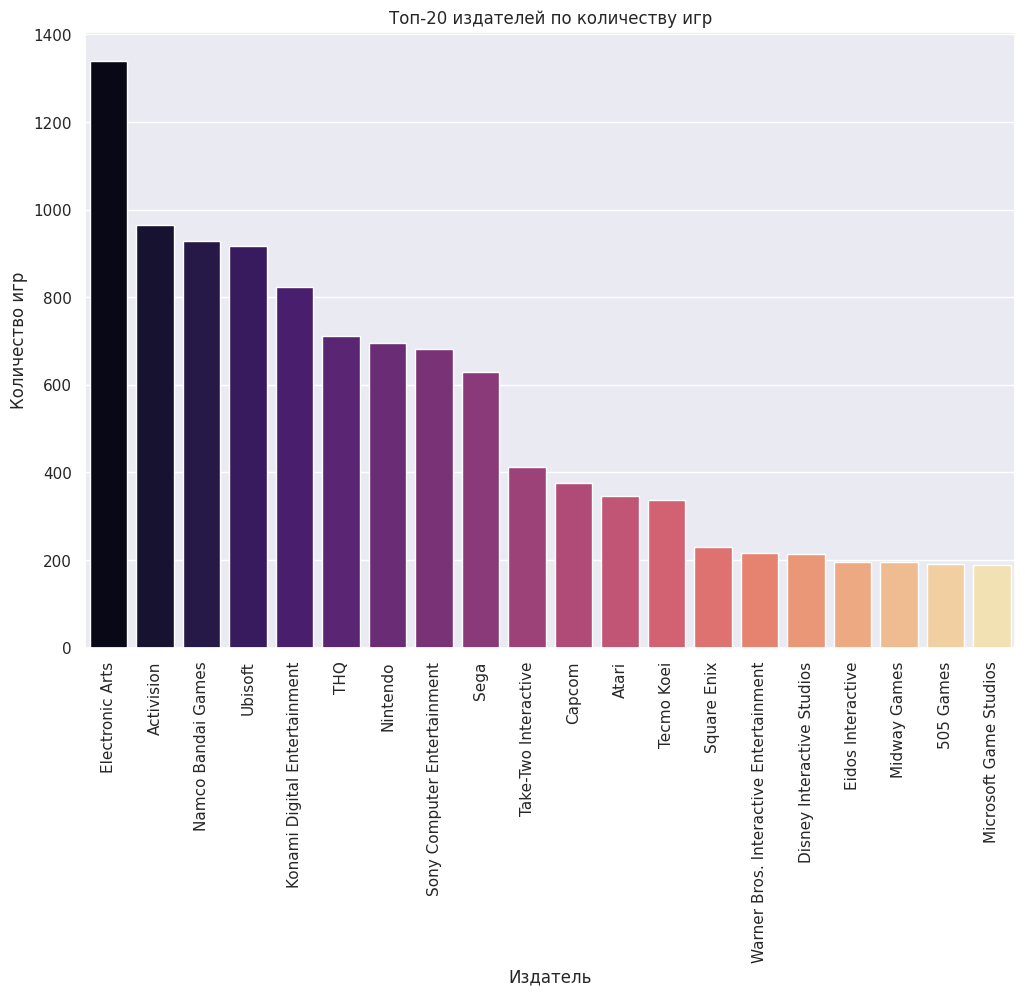

In [41]:
plt.figure(figsize=(12, 8))

sns.countplot(x="Publisher", data=df, order=df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index, palette="magma")

plt.xticks(rotation=90)

plt.xlabel('Издатель')
plt.ylabel('Количество игр')
plt.title('Топ-20 издателей по количеству игр')

plt.show()

# **Топ издатель по количеству игр в год**

In [42]:
top_publisher_count = df.groupby(['Year', 'Publisher']).size().reset_index(name='Count')

max_count_per_year = top_publisher_count.groupby('Year')['Count'].max()

top_publisher_count = top_publisher_count[top_publisher_count.apply(lambda row: row['Count'] == max_count_per_year[row['Year']], axis=1)]

top_publisher_count = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

In [43]:
publisher= top_publisher_count['Publisher']

<ipython-input-44-c19f18a40cb8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Year', y='Count', data=top_publisher_count, palette="magma")


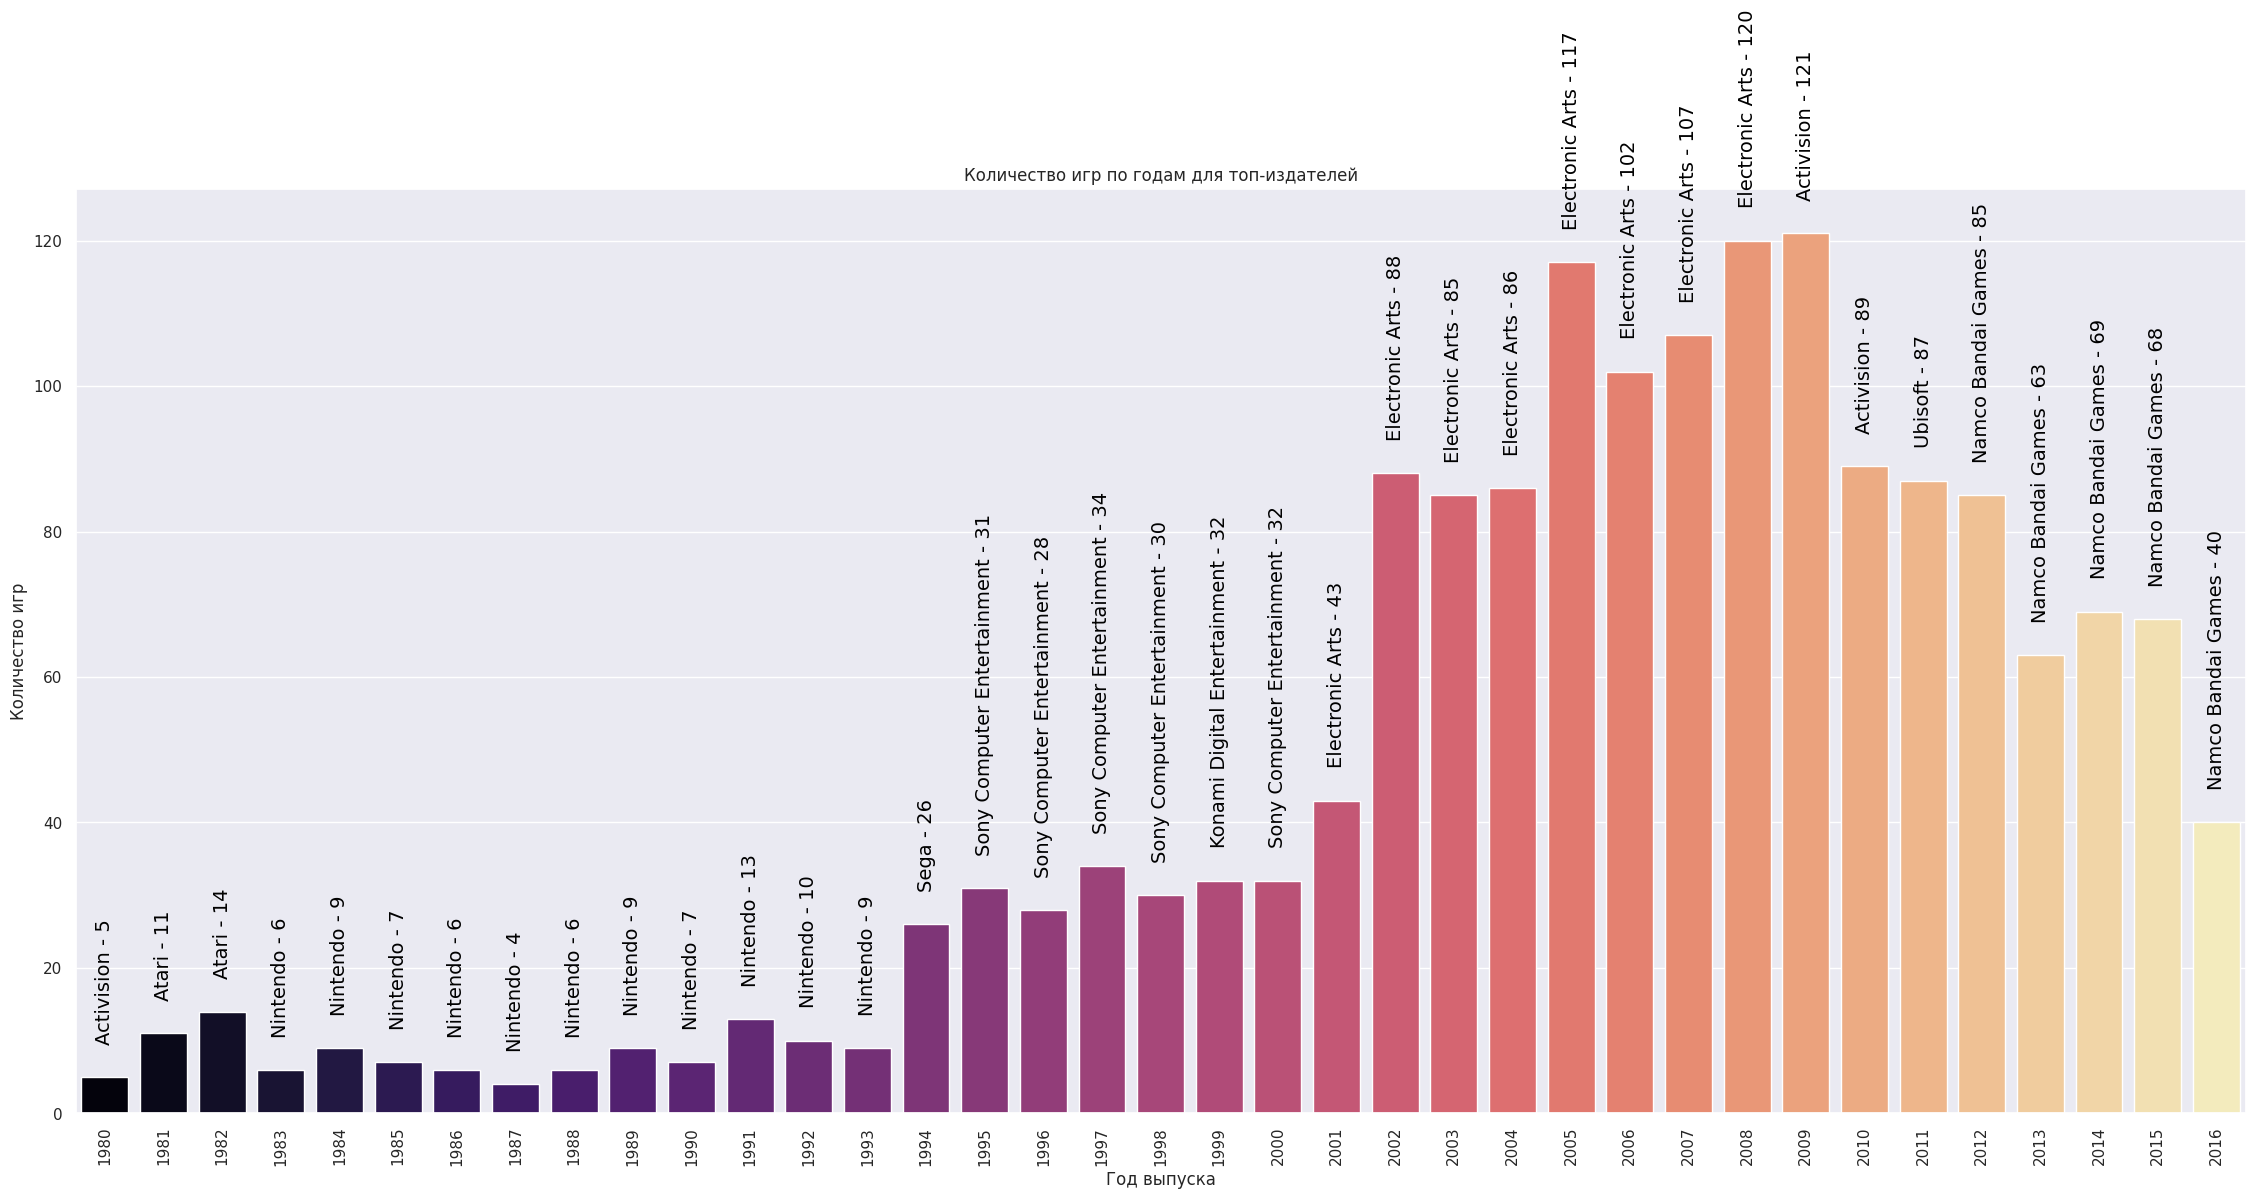

In [44]:
plt.figure(figsize=(28, 12))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count, palette="magma")
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value + 5, str(publisher[index] + ' - ' + str(value)), color='#000', size=14, rotation=90, ha="center")
    index += 1

plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.title('Количество игр по годам для топ-издателей')

plt.xticks(rotation=90)
plt.show()

# **Общая выручка по регионам**

In [45]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.agg({'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum'}).reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4333.16
1,EU_Sales,2409.12
2,JP_Sales,1284.25
3,Other_Sales,788.99


<ipython-input-46-88749747812a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='sale', data=top_sale_reg, palette="magma")


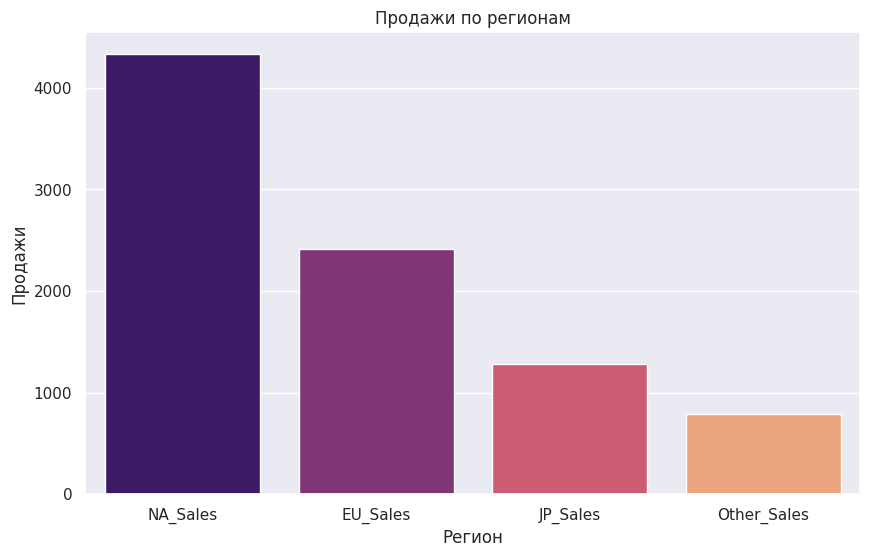

In [46]:
plt.figure(figsize=(10, 6))

sns.barplot(x='region', y='sale', data=top_sale_reg, palette="magma")

plt.xlabel('Регион')
plt.ylabel('Продажи')
plt.title('Продажи по регионам')

plt.show()